In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor



In [2]:
data = pd.read_csv('finaldata6.csv')

In [3]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [4]:
y = data['Time Constant']

In [5]:
X=data.iloc[:,:-2]

In [6]:
y

0       48.241712
1       39.844859
2       35.466772
3       40.875800
4       54.891868
          ...    
191    127.028622
192    190.405133
193    189.558470
194    172.971370
195    214.015430
Name: Time Constant, Length: 196, dtype: float64

In [7]:
X

,Relay Height,Amplitude,Time Period
0,6.0,0.0655,2.5988
1,6.0,0.0830,2.7200
2,6.0,0.0960,2.8004
3,6.0,0.0840,2.8240
4,6.0,0.0625,2.8216
...,...,...,...
191,12.0,0.3530,18.4440
192,12.0,0.2600,20.3600
193,12.0,0.2770,21.5952
194,12.0,0.3115,22.1608


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [9]:
X_test

,Relay Height,Amplitude,Time Period
10,6.0,0.08500,3.23680
79,8.0,0.22700,6.18920
165,12.0,0.55450,1.57410
143,10.0,0.23700,18.60000
163,12.0,0.54450,1.46300
134,10.0,0.27000,8.40000
35,6.0,0.10350,12.82000
137,10.0,0.22100,10.95000
25,6.0,0.13950,6.02440
2,6.0,0.09600,2.80040


In [10]:
y_test


10      46.299593
79      44.192304
165      6.898929
143    159.017609
163      6.529916
134     63.033834
35     150.596519
137    100.395047
25      52.501812
2       35.466772
12      61.007118
128     19.756775
180     47.202032
3       40.875800
48     106.463497
29      57.444042
14      49.125100
119     11.169041
6       51.560704
23      58.389007
108      4.174850
144    161.626992
130     21.569406
175     13.694383
45      79.463259
120     11.026594
174     11.388438
125     12.998564
9       41.030316
164      6.827550
54       8.975710
13      58.004109
109      4.263798
169      8.455448
78      37.089242
114      9.836081
44      62.876022
82      87.057891
159      4.129344
123     12.680069
Name: Time Constant, dtype: float64

In [11]:

# Initialize an empty dictionary to store R2 scores
r2_scores = {}
mse_scores = {}
r2_scores_train = {}
mse_scores_train = {}

In [12]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.metrics import r2_score, mean_squared_error

# # Assuming X and y are already defined
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# # Initialize dictionaries to store R2 scores and MSEs
# r2_scores = {}
# mse_scores = {}

# # Linear Regression with cross-validation
# linear_reg = LinearRegression()
# cv_scores_lr = cross_val_score(linear_reg, X_train, y_train, cv=5, scoring='r2')
# linear_reg.fit(X_train, y_train)
# y_pred_train_lr = linear_reg.predict(X_train)
# y_pred_test_lr = linear_reg.predict(X_test)

# # Calculate R2 and MSE for training data
# r2_train_lr = r2_score(y_train, y_pred_train_lr)
# mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)

# # Calculate R2 and MSE for testing data
# r2_test_lr = r2_score(y_test, y_pred_test_lr)
# mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)

# r2_scores['Linear Regression'] = r2_test_lr
# mse_scores['Linear Regression'] = mse_test_lr

# print(f"Cross-validated R2 scores for Linear Regression: {cv_scores_lr}")
# print(f"Training R2 score for Linear Regression: {r2_train_lr}")
# print(f"Testing R2 score for Linear Regression: {r2_test_lr}")
# print(f"Training MSE for Linear Regression: {mse_train_lr}")
# print(f"Testing MSE for Linear Regression: {mse_test_lr}")

# # Plotting Actual vs Predicted for Testing Data
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=y_test, y=y_pred_test_lr, color='blue', label='Predicted vs Actual')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Linear Regression: Actual vs Predicted')
# plt.legend()
# plt.show()


In [13]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import make_pipeline
# from sklearn.model_selection import GridSearchCV

# param_grid_poly = {'polynomialfeatures__degree': [1, 2, 3, 4, 5]}
# grid_search_poly = GridSearchCV(make_pipeline(PolynomialFeatures(), LinearRegression()), param_grid_poly, cv=5, scoring='r2')
# grid_search_poly.fit(X_train, y_train)
# cv_scores_poly = cross_val_score(grid_search_poly, X_train, y_train, cv=5, scoring='r2')
# y_pred_train_poly = grid_search_poly.predict(X_train)
# y_pred_test_poly = grid_search_poly.predict(X_test)

# # Calculate R2 and MSE for training data
# r2_train_poly = r2_score(y_train, y_pred_train_poly)
# mse_train_poly = mean_squared_error(y_train, y_pred_train_poly)

# # Calculate R2 and MSE for testing data
# r2_test_poly = r2_score(y_test, y_pred_test_poly)
# mse_test_poly = mean_squared_error(y_test, y_pred_test_poly)

# r2_scores['Polynomial Regression'] = r2_test_poly
# mse_scores['Polynomial Regression'] = mse_test_poly

# print(f"Cross-validated R2 scores for Polynomial Regression: {cv_scores_poly}")
# print(f"Training R2 score for Polynomial Regression: {r2_train_poly}")
# print(f"Testing R2 score for Polynomial Regression: {r2_test_poly}")
# print(f"Training MSE for Polynomial Regression: {mse_train_poly}")
# print(f"Testing MSE for Polynomial Regression: {mse_test_poly}")

# # Plotting Actual vs Predicted for Testing Data
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=y_test, y=y_pred_test_poly, color='blue', label='Predicted vs Actual')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Polynomial Regression: Actual vs Predicted')
# plt.legend()
# plt.show()


Cross-validated R2 scores for KNN: [0.98172347 0.90853873 0.96506449 0.91545389 0.9241578 ]
Training R2 score for KNN: 0.9655955468371955
Testing R2 score for KNN: 0.7949641240139041
Training MSE for KNN: 197.89542263924295
Testing MSE for KNN: 359.6952056361
Best parameters for KNN: {'n_neighbors': 5, 'weights': 'uniform'}


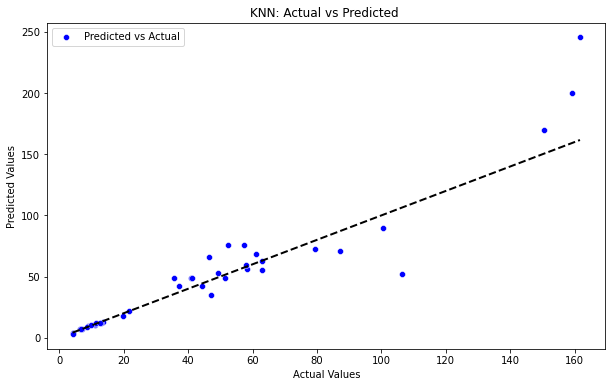

In [14]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# KNN with cross-validation
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring='r2')
grid_search_knn.fit(X_train, y_train)
cv_scores_knn = cross_val_score(grid_search_knn, X_train, y_train, cv=5, scoring='r2')
y_pred_train_knn = grid_search_knn.predict(X_train)
y_pred_test_knn = grid_search_knn.predict(X_test)

# Best parameters for KNN
best_params_knn = grid_search_knn.best_params_

# Calculate R2 and MSE for training data
r2_train_knn = r2_score(y_train, y_pred_train_knn)
mse_train_knn = mean_squared_error(y_train, y_pred_train_knn)

# Calculate R2 and MSE for testing data
r2_test_knn = r2_score(y_test, y_pred_test_knn)
mse_test_knn = mean_squared_error(y_test, y_pred_test_knn)

r2_scores['KNN'] = r2_test_knn
mse_scores['KNN'] = mse_test_knn

r2_scores_train['KNN'] = r2_train_knn
mse_scores_train['KNN'] = mse_train_knn

print(f"Cross-validated R2 scores for KNN: {cv_scores_knn}")
print(f"Training R2 score for KNN: {r2_train_knn}")
print(f"Testing R2 score for KNN: {r2_test_knn}")
print(f"Training MSE for KNN: {mse_train_knn}")
print(f"Testing MSE for KNN: {mse_test_knn}")
print(f"Best parameters for KNN: {best_params_knn}")

# Plotting Actual vs Predicted for Testing Data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_test_knn, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('KNN: Actual vs Predicted ')
plt.legend()
plt.show()


In [15]:
# grid_search_knn.predict([[12,2.7465,10.633]])

In [16]:
# grid_search_knn.predict([[1,0.1601,7.332]])

In [17]:
# grid_search_knn.predict([[6,0.499,7.359]])

In [18]:
# grid_search_knn.predict([[8,1.843,11.038]])

Cross-validated R2 scores for SVR: [0.95410607 0.83260445 0.91815638 0.87376465 0.86934585]
Training R2 score for SVR: 0.9128266052392217
Testing R2 score for SVR: 0.8688913541779644
Training MSE for SVR: 501.42392083512414
Testing MSE for SVR: 230.0043887091531
Best parameters for SVR: {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}


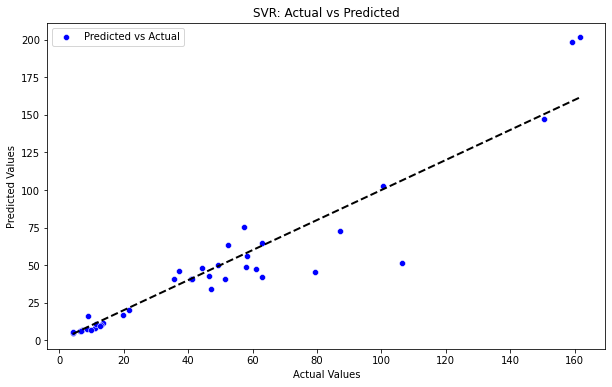

In [19]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# SVR with cross-validation
param_grid_svr = {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.2], 'kernel': ['linear', 'rbf']}
grid_search_svr = GridSearchCV(SVR(), param_grid_svr, cv=5, scoring='r2')
grid_search_svr.fit(X_train, y_train)
cv_scores_svr = cross_val_score(grid_search_svr, X_train, y_train, cv=5, scoring='r2')
y_pred_train_svr = grid_search_svr.predict(X_train)
y_pred_test_svr = grid_search_svr.predict(X_test)

# Best parameters for SVR
best_params_svr = grid_search_svr.best_params_

# Calculate R2 and MSE for training data
r2_train_svr = r2_score(y_train, y_pred_train_svr)
mse_train_svr = mean_squared_error(y_train, y_pred_train_svr)

# Calculate R2 and MSE for testing data
r2_test_svr = r2_score(y_test, y_pred_test_svr)
mse_test_svr = mean_squared_error(y_test, y_pred_test_svr)

r2_scores['SVR'] = r2_test_svr
mse_scores['SVR'] = mse_test_svr

r2_scores_train['SVR'] = r2_train_svr
mse_scores_train['SVR'] = mse_train_svr

print(f"Cross-validated R2 scores for SVR: {cv_scores_svr}")
print(f"Training R2 score for SVR: {r2_train_svr}")
print(f"Testing R2 score for SVR: {r2_test_svr}")
print(f"Training MSE for SVR: {mse_train_svr}")
print(f"Testing MSE for SVR: {mse_test_svr}")
print(f"Best parameters for SVR: {best_params_svr}")

# Plotting Actual vs Predicted for Testing Data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_test_svr, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR: Actual vs Predicted')
plt.legend()
plt.show()


In [20]:
# grid_search_svr.predict([[12,2.7465,10.633]])

In [21]:
grid_search_svr.predict([[1,0.1601,7.332]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([110.2046765])

In [22]:
grid_search_svr.predict([[6,0.499,7.359]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([76.62188103])

In [23]:
grid_search_svr.predict([[8,1.843,11.038]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([112.49280493])

In [24]:
grid_search_svr.predict([[6,0.086,0.3864]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([33.39034012])

In [25]:
grid_search_svr.predict([[11,0.5135,2.9002]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([9.53911075])

Cross-validated R2 scores for Decision Tree: [0.9831144  0.92896884 0.92469904 0.93735877 0.95042087]
Training R2 score for Decision Tree: 1.0
Testing R2 score for Decision Tree: 0.799926464414133
Training MSE for Decision Tree: 0.0
Testing MSE for Decision Tree: 350.9897532750817
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


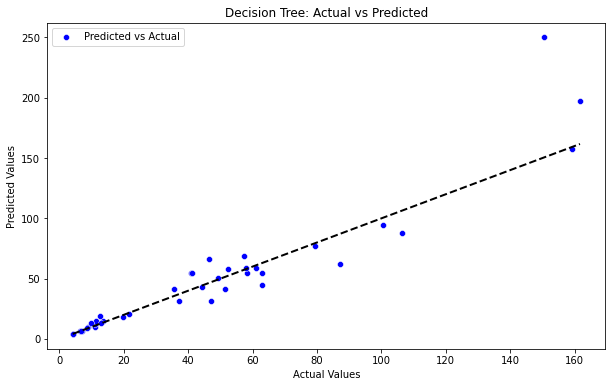

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Decision Tree with cross-validation
param_grid_dt = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_search_dt = GridSearchCV(DecisionTreeRegressor(random_state=1), param_grid_dt, cv=5, scoring='r2')
grid_search_dt.fit(X_train, y_train)
cv_scores_dt = cross_val_score(grid_search_dt, X_train, y_train, cv=5, scoring='r2')
y_pred_train_dt = grid_search_dt.predict(X_train)
y_pred_test_dt = grid_search_dt.predict(X_test)

# Best parameters for Decision Tree
best_params_dt = grid_search_dt.best_params_

# Calculate R2 and MSE for training data
r2_train_dt = r2_score(y_train, y_pred_train_dt)
mse_train_dt = mean_squared_error(y_train, y_pred_train_dt)

# Calculate R2 and MSE for testing data
r2_test_dt = r2_score(y_test, y_pred_test_dt)
mse_test_dt = mean_squared_error(y_test, y_pred_test_dt)

r2_scores['Decision Tree'] = r2_test_dt
mse_scores['Decision Tree'] = mse_test_dt

r2_scores_train['Decision Tree'] = r2_train_dt
mse_scores_train['Decision Tree'] = mse_train_dt

print(f"Cross-validated R2 scores for Decision Tree: {cv_scores_dt}")
print(f"Training R2 score for Decision Tree: {r2_train_dt}")
print(f"Testing R2 score for Decision Tree: {r2_test_dt}")
print(f"Training MSE for Decision Tree: {mse_train_dt}")
print(f"Testing MSE for Decision Tree: {mse_test_dt}")
print(f"Best parameters for Decision Tree: {best_params_dt}")

# Plotting Actual vs Predicted for Testing Data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_test_dt, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree: Actual vs Predicted')
plt.legend()
plt.show()


In [27]:
grid_search_dt.predict([[12,2.7465,10.633]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([96.90959639])

In [28]:
grid_search_dt.predict([[1,0.1601,7.332]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([65.81627165])

In [29]:
grid_search_dt.predict([[6,0.499,7.359]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([36.05746679])

In [30]:
grid_search_dt.predict([[8,1.843,11.038]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([94.63744873])

In [31]:
grid_search_dt.predict([[6,0.086,0.3864]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([48.2417122])

In [32]:
grid_search_dt.predict([[11,0.5135,2.9002]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([15.06914449])

Cross-validated R2 scores for Random Forest: [0.98747146 0.92993074 0.96854633 0.94625797 0.95411535]
Training R2 score for Random Forest: 0.9949066168875376
Testing R2 score for Random Forest: 0.9557912475093294
Training MSE for Random Forest: 29.29728889846324
Testing MSE for Random Forest: 77.55558017137227
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


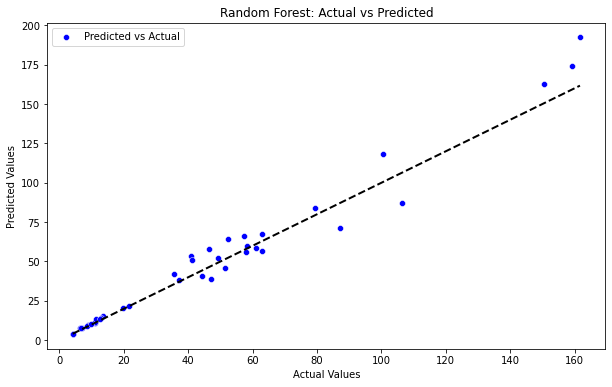

In [33]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Random Forest with cross-validation
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=1), param_grid_rf, cv=5, scoring='r2')
grid_search_rf.fit(X_train, y_train)
cv_scores_rf = cross_val_score(grid_search_rf, X_train, y_train, cv=5, scoring='r2')
y_pred_train_rf = grid_search_rf.predict(X_train)
y_pred_test_rf = grid_search_rf.predict(X_test)

# Best parameters for Random Forest
best_params_rf = grid_search_rf.best_params_

# Calculate R2 and MSE for training data
r2_train_rf = r2_score(y_train, y_pred_train_rf)
mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)

# Calculate R2 and MSE for testing data
r2_test_rf = r2_score(y_test, y_pred_test_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)

r2_scores['Random Forest'] = r2_test_rf
mse_scores['Random Forest'] = mse_test_rf

r2_scores_train['Random Forest'] = r2_train_rf
mse_scores_train['Random Forest'] = mse_train_rf

print(f"Cross-validated R2 scores for Random Forest: {cv_scores_rf}")
print(f"Training R2 score for Random Forest: {r2_train_rf}")
print(f"Testing R2 score for Random Forest: {r2_test_rf}")
print(f"Training MSE for Random Forest: {mse_train_rf}")
print(f"Testing MSE for Random Forest: {mse_test_rf}")
print(f"Best parameters for Random Forest: {best_params_rf}")

# Plotting Actual vs Predicted for Testing Data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_test_rf, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted')
plt.legend()
plt.show()


In [34]:
grid_search_rf.predict([[12,2.7465,10.633]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([104.54611621])

In [35]:
grid_search_rf.predict([[1,0.1601,7.332]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([65.40764966])

In [36]:
grid_search_rf.predict([[6,0.499,7.359]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([40.22305491])

In [37]:
grid_search_rf.predict([[8,1.843,11.038]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([108.91743802])

In [38]:
grid_search_rf.predict([[6,0.086,0.3864]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([38.98422446])

In [39]:
grid_search_rf.predict([[11,0.5135,2.9002]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([14.94180394])

Cross-validated R2 scores for GBM: [0.98360889 0.94060178 0.9723402  0.96112329 0.9631241 ]
Training R2 score for GBM: 0.9999929747586552
Testing R2 score for GBM: 0.9650994271665847
Training MSE for GBM: 0.040409394054181126
Testing MSE for GBM: 61.22620571525893
Best parameters for GBM: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


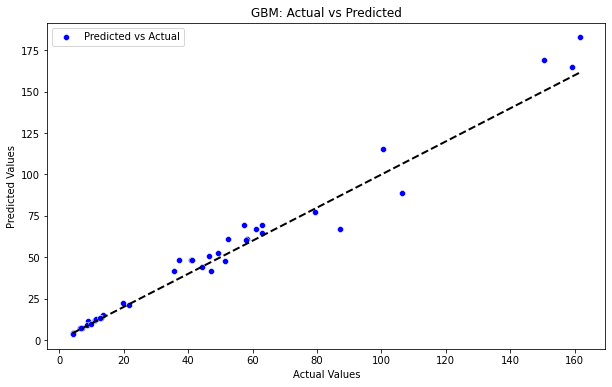

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# GBM with cross-validation
param_grid_gbm = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
grid_search_gbm = GridSearchCV(GradientBoostingRegressor(random_state=1), param_grid_gbm, cv=5, scoring='r2')
grid_search_gbm.fit(X_train, y_train)
cv_scores_gbm = cross_val_score(grid_search_gbm, X_train, y_train, cv=5, scoring='r2')
y_pred_train_gbm = grid_search_gbm.predict(X_train)
y_pred_test_gbm = grid_search_gbm.predict(X_test)

# Best parameters for GBM
best_params_gbm = grid_search_gbm.best_params_

# Calculate R2 and MSE for training data
r2_train_gbm = r2_score(y_train, y_pred_train_gbm)
mse_train_gbm = mean_squared_error(y_train, y_pred_train_gbm)

# Calculate R2 and MSE for testing data
r2_test_gbm = r2_score(y_test, y_pred_test_gbm)
mse_test_gbm = mean_squared_error(y_test, y_pred_test_gbm)

r2_scores['GBM'] = r2_test_gbm
mse_scores['GBM'] = mse_test_gbm

r2_scores_train['GBM'] = r2_train_gbm
mse_scores_train['GBM'] = mse_train_gbm

print(f"Cross-validated R2 scores for GBM: {cv_scores_gbm}")
print(f"Training R2 score for GBM: {r2_train_gbm}")
print(f"Testing R2 score for GBM: {r2_test_gbm}")
print(f"Training MSE for GBM: {mse_train_gbm}")
print(f"Testing MSE for GBM: {mse_test_gbm}")
print(f"Best parameters for GBM: {best_params_gbm}")

# Plotting Actual vs Predicted for Testing Data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_test_gbm, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('GBM: Actual vs Predicted')
plt.legend()
plt.show()


In [41]:
grid_search_gbm.predict([[12,2.7465,10.633]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([94.38313046])

In [42]:
grid_search_gbm.predict([[1,0.1601,7.332]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([67.13419665])

In [43]:
grid_search_gbm.predict([[6,0.499,7.359]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([33.4800146])

In [44]:
grid_search_gbm.predict([[8,1.843,11.038]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([92.7558674])

In [45]:
grid_search_gbm.predict([[6,0.086,0.3864]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([31.09184247])

In [46]:
grid_search_gbm.predict([[11,0.5135,2.9002]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([15.30347693])

Cross-validated R2 scores for XGBoost: [0.97851848 0.93798135 0.97091846 0.94568387 0.96677031]
Training R2 score for XGBoost: 0.9997352394784504
Testing R2 score for XGBoost: 0.9538676820725239
Training MSE for XGBoost: 1.522910277407909
Testing MSE for XGBoost: 80.93009822592569
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


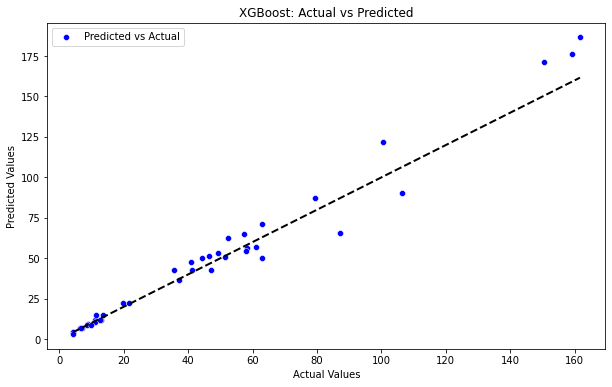

In [47]:
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# XGBoost with cross-validation
param_grid_xgb = {'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 200]}
grid_search_xgb = GridSearchCV(xgb.XGBRegressor(random_state=1), param_grid_xgb, cv=5, scoring='r2')
grid_search_xgb.fit(X_train, y_train)
cv_scores_xgb = cross_val_score(grid_search_xgb, X_train, y_train, cv=5, scoring='r2')
y_pred_train_xgb = grid_search_xgb.predict(X_train)
y_pred_test_xgb = grid_search_xgb.predict(X_test)

# Best parameters for XGBoost
best_params_xgb = grid_search_xgb.best_params_

# Calculate R2 and MSE for training data
r2_train_xgb = r2_score(y_train, y_pred_train_xgb)
mse_train_xgb = mean_squared_error(y_train, y_pred_train_xgb)

# Calculate R2 and MSE for testing data
r2_test_xgb = r2_score(y_test, y_pred_test_xgb)
mse_test_xgb = mean_squared_error(y_test, y_pred_test_xgb)

r2_scores['XGBoost'] = r2_test_xgb
mse_scores['XGBoost'] = mse_test_xgb

r2_scores_train['XGBoost'] = r2_train_xgb
mse_scores_train['XGBoost'] = mse_train_xgb

print(f"Cross-validated R2 scores for XGBoost: {cv_scores_xgb}")
print(f"Training R2 score for XGBoost: {r2_train_xgb}")
print(f"Testing R2 score for XGBoost: {r2_test_xgb}")
print(f"Training MSE for XGBoost: {mse_train_xgb}")
print(f"Testing MSE for XGBoost: {mse_test_xgb}")
print(f"Best parameters for XGBoost: {best_params_xgb}")

# Plotting Actual vs Predicted for Testing Data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_test_xgb, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost: Actual vs Predicted')
plt.legend()
plt.show()


In [48]:
grid_search_xgb.predict([[12,2.7465,10.633]])

array([88.05886], dtype=float32)

In [49]:
grid_search_xgb.predict([[1,0.1601,7.332]])

array([65.21262], dtype=float32)

In [50]:
grid_search_xgb.predict([[8,1.843,11.038]])

array([87.77816], dtype=float32)

In [51]:
grid_search_xgb.predict([[6,0.086,0.3864]])

array([32.868286], dtype=float32)

In [52]:
r2_scores_train

{'KNN': 0.9655955468371955,
 'SVR': 0.9128266052392217,
 'Decision Tree': 1.0,
 'Random Forest': 0.9949066168875376,
 'GBM': 0.9999929747586552,
 'XGBoost': 0.9997352394784504}

In [53]:
mse_scores_train

{'KNN': 197.89542263924295,
 'SVR': 501.42392083512414,
 'Decision Tree': 0.0,
 'Random Forest': 29.29728889846324,
 'GBM': 0.040409394054181126,
 'XGBoost': 1.522910277407909}

In [54]:
r2_scores

{'KNN': 0.7949641240139041,
 'SVR': 0.8688913541779644,
 'Decision Tree': 0.799926464414133,
 'Random Forest': 0.9557912475093294,
 'GBM': 0.9650994271665847,
 'XGBoost': 0.9538676820725239}

In [55]:
mse_scores

{'KNN': 359.6952056361,
 'SVR': 230.0043887091531,
 'Decision Tree': 350.9897532750817,
 'Random Forest': 77.55558017137227,
 'GBM': 61.22620571525893,
 'XGBoost': 80.93009822592569}

In [56]:
r2_scores_test = r2_scores
r2_scores_test

{'KNN': 0.7949641240139041,
 'SVR': 0.8688913541779644,
 'Decision Tree': 0.799926464414133,
 'Random Forest': 0.9557912475093294,
 'GBM': 0.9650994271665847,
 'XGBoost': 0.9538676820725239}

In [57]:
mse_scores_test = mse_scores
mse_scores_test

{'KNN': 359.6952056361,
 'SVR': 230.0043887091531,
 'Decision Tree': 350.9897532750817,
 'Random Forest': 77.55558017137227,
 'GBM': 61.22620571525893,
 'XGBoost': 80.93009822592569}

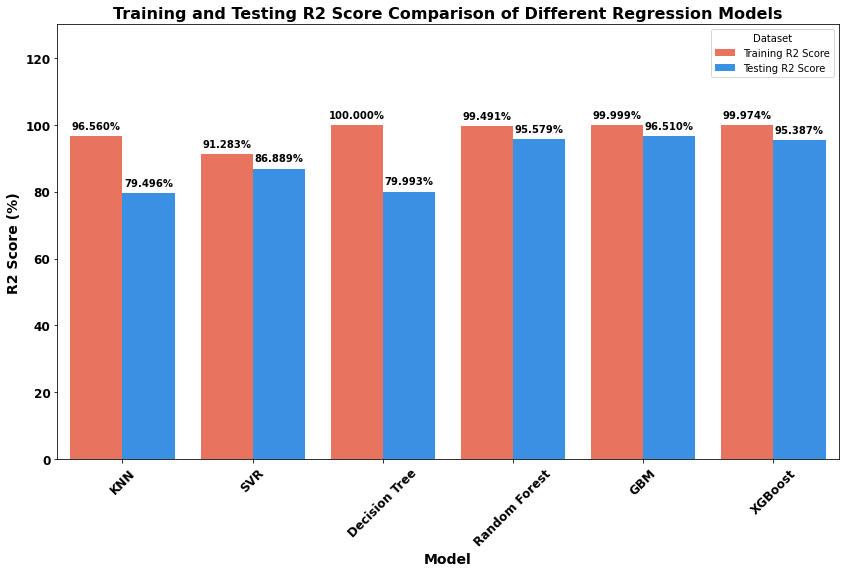

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming r2_scores_train and r2_scores_test are defined
# Creating a DataFrame from the dictionaries
r2_df = pd.DataFrame({
    'Model': list(r2_scores_train.keys()),
    'Training R2 Score': [val * 100 for val in r2_scores_train.values()],
    'Testing R2 Score': [val * 100 for val in r2_scores_test.values()]
})

# Melt the DataFrame to have a suitable format for seaborn's barplot
r2_df_melted = r2_df.melt(id_vars='Model', value_vars=['Training R2 Score', 'Testing R2 Score'], 
                          var_name='Dataset', value_name='R2 Score (%)')

# Plotting the R2 scores side by side
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='Model', y='R2 Score (%)', hue='Dataset', data=r2_df_melted, palette=['tomato', 'dodgerblue'])

# Adding exact R2 scores in percentage format on bars
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.3f}%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 10), 
                     textcoords='offset points', 
                     fontsize=10, color='black', fontweight='bold')

# Setting bold font for axis labels and title
plt.ylabel('R2 Score (%)', fontsize=14, fontweight='bold')
plt.xlabel('Model', fontsize=14, fontweight='bold')
plt.title('Training and Testing R2 Score Comparison of Different Regression Models', fontsize=16, fontweight='bold')

# Rotating x-axis labels and making them bold
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Set y-axis limit from 0 to 130 for percentage representation
plt.ylim(0, 130)

plt.show()


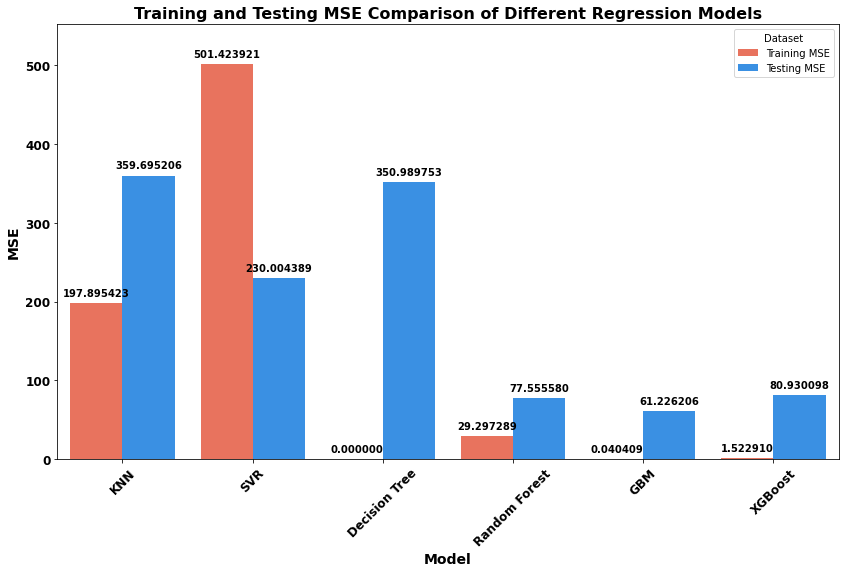

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming mse_scores_train and mse_scores_test are defined
# Creating a DataFrame from the dictionaries
mse_df = pd.DataFrame({
    'Model': list(mse_scores_train.keys()),
    'Training MSE': list(mse_scores_train.values()),
    'Testing MSE': list(mse_scores_test.values())
})

# Melt the DataFrame to have a suitable format for seaborn's barplot
mse_df_melted = mse_df.melt(id_vars='Model', value_vars=['Training MSE', 'Testing MSE'], 
                            var_name='Dataset', value_name='MSE')

# Plotting the MSE scores side by side
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='Model', y='MSE', hue='Dataset', data=mse_df_melted, palette=['tomato', 'dodgerblue'])

# Adding exact MSE scores on bars
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.6f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 10), 
                     textcoords='offset points', 
                     fontsize=10, color='black', fontweight='bold')

# Setting bold font for axis labels and title
plt.ylabel('MSE', fontsize=14, fontweight='bold')
plt.xlabel('Model', fontsize=14, fontweight='bold')
plt.title('Training and Testing MSE Comparison of Different Regression Models', fontsize=16, fontweight='bold')

# Rotating x-axis labels and making them bold
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Set y-axis limit for better visualization
plt.ylim(0, max(max(mse_scores_train.values()), max(mse_scores_test.values())) * 1.1)

plt.show()


In [60]:
data

,Relay Height,Amplitude,Time Period,Time Constant,Delay
0,6.0,0.0655,2.5988,48.241712,0.653227
1,6.0,0.0830,2.7200,39.844859,0.684683
2,6.0,0.0960,2.8004,35.466772,0.705680
3,6.0,0.0840,2.8240,40.875800,0.710921
4,6.0,0.0625,2.8216,54.891868,0.709053
...,...,...,...,...,...
191,12.0,0.3530,18.4440,127.028622,4.678690
192,12.0,0.2600,20.3600,190.405133,5.144994
193,12.0,0.2770,21.5952,189.558470,5.460955
194,12.0,0.3115,22.1608,172.971370,5.611949
